In [1]:
#necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
import datetime
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2
import PIL.Image
import matplotlib 
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import shutil
import posixpath
import sys 
import glob
#import wfdb
import pandas as pd
import math
from PIL import Image

In [2]:
#import keras
import tensorflow as tf
from tensorflow import keras
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam, SGD
import numpy as np
from keras.models import Sequential

In [11]:
#pip install tensorflow

In [3]:
tf.compat.v1.ConfigProto( device_count = {'GPU': 1 , 'CPU': 10})

device_count {
  key: "CPU"
  value: 10
}
device_count {
  key: "GPU"
  value: 1
}

In [22]:
##Resize images to default pretrained tensor size: 224, 224, 3
def new_images(path):
    for image in os.listdir(path):
        print(image)
        name = os.path.basename(image)
        image = Image.open(path +'/' + image)
        resized_image = image.resize((224, 224))
        resized_image.save(path +'/' + name)

##extract images of separate channels from csv without transformation--data is already clean
def extract_images(source_path, destination_path, channel):
    for file in os.listdir(source_path):
        #open csv from the source_path
        df = pd.read_csv(source_path+'/'+file)
        #that channel values are converted to arrays to ease graphing
        graph = np.array(df[channel])
        #plot the channel points
        image = plt.plot(graph, label='Channel:'+ channel)
        #save the image in the destination
        plt.savefig(destination_path+'/'+file+'.png')
        #graph is reset and plot is closed to avoid overlap
        plt.close()
        graph = 0
        image = 0
        
    return 

In [23]:
#h_source = './ptb_resnet_rerun/second_arch/Healthy control'
#h_dest_ii = './ptb_resnet_rerun/second_arch/ii'
#h_dest_v6 = './ptb_resnet_rerun/second_arch/v6'
#h_dest_vz = './ptb_resnet_rerun/second_arch/vz'
#extract_images(h_source, h_dest_ii, 'ii')

In [24]:
#extract_images(h_source, h_dest_v6, 'v6')
#extract_images(h_source, h_dest_vz, 'vz')

In [25]:
#mi_source = './ptb_resnet_rerun/second_arch/Myocardial Infarction'
#mi_dest_ii = './ptb_resnet_rerun/second_arch/ii'
#mi_dest_v6 = './ptb_resnet_rerun/second_arch/v6'
#mi_dest_vz = './ptb_resnet_rerun/second_arch/vz'
#extract_images(mi_source, mi_dest_ii, 'ii')
#extract_images(mi_source, mi_dest_v6, 'v6')
#extract_images(mi_source, mi_dest_vz, 'vz')

In [45]:
#new_images('./ptb_resnet_rerun/second_arch/ii/Healthy control')
#new_images('./ptb_resnet_rerun/second_arch/v6/Healthy control')
#new_images('./ptb_resnet_rerun/second_arch/vz/Healthy control')
#new_images('./ptb_resnet_rerun/second_arch/ii/Myocardial Infarction')
#new_images('./ptb_resnet_rerun/second_arch/v6/Myocardial Infarction')
#new_images('./ptb_resnet_rerun/second_arch/vz/Myocardial Infarction')

1005.csv.png
1006.csv.png
1007.csv.png
1008.csv.png
1009.csv.png
1010.csv.png
1035.csv.png
1036.csv.png
1037.csv.png
1089.csv.png
1090.csv.png
1091.csv.png
1104.csv.png
1105.csv.png
1106.csv.png
1107.csv.png
1108.csv.png
1109.csv.png
1137.csv.png
1138.csv.png
1139.csv.png
1140.csv.png
1141.csv.png
1142.csv.png
1143.csv.png
1144.csv.png
1145.csv.png
1155.csv.png
1156.csv.png
1157.csv.png
1158.csv.png
1159.csv.png
1160.csv.png
1161.csv.png
1162.csv.png
1163.csv.png
1167.csv.png
1168.csv.png
1169.csv.png
1170.csv.png
1171.csv.png
1172.csv.png
1173.csv.png
1174.csv.png
1175.csv.png
1176.csv.png
1177.csv.png
1178.csv.png
1179.csv.png
1180.csv.png
1181.csv.png
1197.csv.png
1198.csv.png
1199.csv.png
1200.csv.png
1201.csv.png
1202.csv.png
1203.csv.png
1204.csv.png
1205.csv.png
1206.csv.png
1207.csv.png
1208.csv.png
1209.csv.png
1210.csv.png
1211.csv.png
1212.csv.png
1213.csv.png
1214.csv.png
1215.csv.png
1216.csv.png
1217.csv.png
1224.csv.png
1225.csv.png
1226.csv.png
1230.csv.png
1231.csv.png

In [ ]:
#%reset -f

In [4]:
#class_present = ['Bundle branch block','Cardiomyopathy','Dysrhythmia','Healthy control','Heart failure (NYHA 2)',
# 'Heart failure (NYHA 3)','Heart failure (NYHA 4)','Hypertrophy', 'Myocardial Infarction'
#'Myocarditis','Palpitation', 'Stable angina', 'Unqualified', 'Unstable angina', 'Valvular heart disease']
class_present = ['Healthy control', 'Myocardial Infarction']

In [5]:
img = 'E:/Jupyter/A_DNN/ptb_resnet_rerun/second_arch/ii/Healthy control/948.csv.png'
image = Image.open(img)

In [6]:
image.size  ##old size = 640,480

(224, 224)

In [7]:
##train resnet50 on ii(rhythm strip) v6(anterior segment) vz(part of vectorcardiogram)
train_dataset_ii = tf.keras.preprocessing.image_dataset_from_directory(
    './ptb_resnet_rerun/second_arch/ii/',
    image_size=(224, 224),
    batch_size=16,
    validation_split=0.2,
    subset='training',
    shuffle=True,
    seed=39  ##no weights initialized here by deafult so not used
)

Found 1280 files belonging to 2 classes.
Using 1024 files for training.


In [8]:
val_dataset_ii = tf.keras.preprocessing.image_dataset_from_directory(
    './ptb_resnet_rerun/second_arch/ii/',
    image_size=(224, 224),
    batch_size=16,
    validation_split=0.2,
    subset='validation',
    shuffle=True,
    seed=39  ##no weights initialized here by deafult so not used
)

Found 1280 files belonging to 2 classes.
Using 256 files for validation.


In [9]:
model_ii = Sequential()

In [1]:
#!pip install --upgrade keras

In [10]:
##default model weights
custom_model_ii = ResNet50(include_top=False, weights='imagenet', input_tensor=None, 
                 input_shape=(224, 224, 3), classes=2, classifier_activation="softmax")

for layer in custom_model_ii.layers:
    layer.trainable=False

In [32]:
#custom_model_ii.layers

In [10]:
##include confusion matrix, fail to rerun with top so manually decode predictions

In [11]:
model_ii.add(keras.Input(shape=(224,224,3)))
model_ii.add(custom_model_ii)
model_ii.add(Flatten())
#model_ii.add(Dense(512, activation='relu'))
model_ii.add(Dense(1024, activation= 'relu'))  ##4096
#model_ii.add(Dense(4096, activation= 'relu'))
model_ii.add(Dense(512, activation= 'relu'))   ##1000
model_ii.add(Dense(2, activation='softmax'))  ##no of classes

In [12]:
model_ii.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │     102,761,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 126,875,010 (483.99 MB)

 Trainable params: 103,287,298 (394.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [14]:
model_ii.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
model_ii.fit(
    train_dataset_ii,
    #val_dataset,
    epochs=20  #20 #instead of 100, since takes too long over same accuracy, no oscillations
)

Epoch 1/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 1241s 19s/step - accuracy: 0.7796 - loss: 8.4826
Epoch 2/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 1090s 17s/step - accuracy: 0.9336 - loss: 0.4567
Epoch 3/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 631s 10s/step - accuracy: 0.9755 - loss: 0.0550
Epoch 4/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 1176s 18s/step - accuracy: 0.9945 - loss: 0.0143
Epoch 5/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 652s 10s/step - accuracy: 0.9753 - loss: 0.1206
Epoch 6/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 982s 15s/step - accuracy: 0.9687 - loss: 0.1406
Epoch 7/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 561s 9s/step - accuracy: 0.9884 - loss: 0.0624
Epoch 8/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 514s 8s/step - accuracy: 0.9820 - loss: 0.0838
Epoch 9/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 2292s 36s/step - accuracy: 0.9881 - loss: 0.0459
Epoch 10/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 711s 11s/step - accuracy: 1.0000 - loss: 7.6167e-04
Epoch 11/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 761s 12s/step - accuracy: 1.0000 - loss: 2.3986e-05
Epoch 12/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 553

In [17]:
model_ii.fit(
    #train_dataset,
    val_dataset_ii,
    epochs=10  ##change to 10 #20 #instead of 100, since takes too long over same accuracy, no oscillations
)

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 257s 15s/step - accuracy: 0.9815 - loss: 0.0520
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 151s 8s/step - accuracy: 1.0000 - loss: 1.5173e-04
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 186s 11s/step - accuracy: 1.0000 - loss: 0.0094
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 238s 14s/step - accuracy: 1.0000 - loss: 6.7023e-06
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 198s 12s/step - accuracy: 1.0000 - loss: 8.7053e-06
Epoch 6/10



KeyboardInterrupt



In [18]:
model_ii.save('./models/resnet50_ii_images.keras')

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [20]:
##plot graphs
y_pred_prob = model_ii.predict(val_dataset_ii)

16/16 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step


In [21]:
y_val = np.concatenate([y for x, y in val_dataset_ii], axis=0)

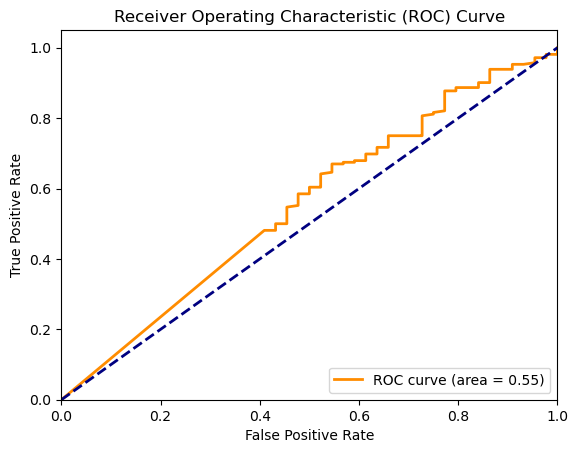

In [23]:
y_val_2 = y_val.flatten()
y_pred_prob_2 = y_pred_prob.flatten()
fpr, tpr, _ = roc_curve(y_val_2[:256], y_pred_prob_2[:256])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [25]:
y_true = np.concatenate([y for _, y in val_dataset_ii], axis=0)

In [64]:
#y_true

In [26]:
flat_preds = y_pred_prob.flatten()
y_pred_prob_2 = []
for i in range(0,len(flat_preds)):
    y_pred_prob_2.append(int(flat_preds[i]))

In [27]:
y_pred_prob_new = np.array(y_pred_prob_2)
#y_pred_prob_new

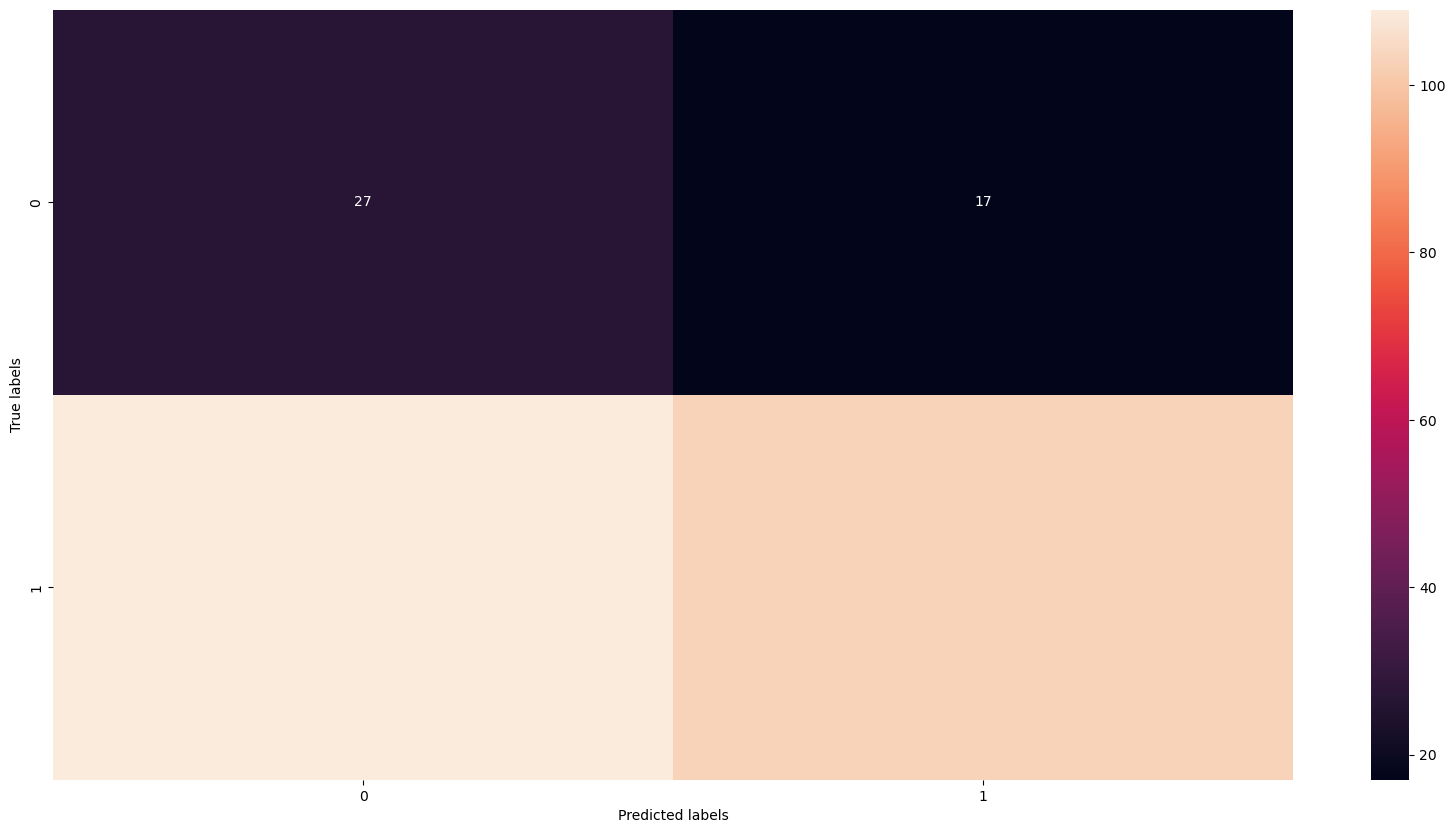

In [28]:
cm = confusion_matrix(y_true[:256], y_pred_prob_new[:256])
convnet_df_cm = pd.DataFrame(cm)
plt.figure(figsize = (20,10))
sns.heatmap(convnet_df_cm, annot=True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [29]:
from sklearn.metrics import classification_report
report = classification_report(y_true[:256], y_pred_prob_new[:256])

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.61      0.30        44
           1       0.86      0.49      0.62       212

    accuracy                           0.51       256
   macro avg       0.53      0.55      0.46       256
weighted avg       0.74      0.51      0.57       256



# ____END OF II-IMAGE BASED TRAINING_

In [30]:
train_dataset_v6 = tf.keras.preprocessing.image_dataset_from_directory(
    './ptb_resnet_rerun/second_arch/v6/',
    image_size=(224, 224),
    batch_size=16,
    validation_split=0.2,
    subset='training',
    shuffle=True,
    seed=39  ##no weights initialized here by deafult so not used
)

Found 1280 files belonging to 2 classes.
Using 1024 files for training.


In [31]:
val_dataset_v6 = tf.keras.preprocessing.image_dataset_from_directory(
    './ptb_resnet_rerun/second_arch/v6/',
    image_size=(224, 224),
    batch_size=16,
    validation_split=0.2,
    subset='validation',
    shuffle=True,
    seed=39  ##no weights initialized here by deafult so not used
)

Found 1280 files belonging to 2 classes.
Using 256 files for validation.


In [32]:
model_v6 = Sequential()

In [33]:
##default model weights
custom_model_v6 = ResNet50(include_top=False, weights='imagenet', input_tensor=None, 
                 input_shape=(224, 224, 3), classes=2, classifier_activation="softmax")

for layer in custom_model_v6.layers:
    layer.trainable=False

In [34]:
model_v6.add(keras.Input(shape=(224,224,3)))
model_v6.add(custom_model_v6)
model_v6.add(Flatten())
#model_v6.add(Dense(512, activation='relu'))
model_v6.add(Dense(1024, activation= 'relu'))  ##4096
#model_v6.add(Dense(4096, activation= 'relu'))
model_v6.add(Dense(512, activation= 'relu'))   ##1000
model_v6.add(Dense(2, activation='softmax'))  ##no of classes

In [35]:
model_v6.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1024)                │     102,761,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 126,875,010 (483.99 MB)

 Trainable params: 103,287,298 (394.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [36]:
model_v6.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_v6.fit(
    train_dataset_v6,
    #val_dataset,
    epochs=10  #20 #instead of 100, since takes too long over same accuracy, no oscillations
)

Epoch 1/10
12/64 ━━━━━━━━━━━━━━━━━━━━ 11:45 14s/step - accuracy: 0.6806 - loss: 27.5851

In [ ]:
model_v6.fit(
    val_dataset_v6,
    #val_dataset,
    epochs=10  #20 #instead of 100, since takes too long over same accuracy, no oscillations
)

In [ ]:
model_v6.save('./models/resnet50_v6_images.keras')